In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('linear.csv')

In [4]:
data 

,Unnamed: 0,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,1,80.0,9600,1976,1976,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,2,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,3,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,4,84.0,14260,2000,2000,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,1455,62.0,7917,1999,2000,0.0,0,0,953,953,...,0,0,0,0,1,0,0,0,1,0
1447,1456,85.0,13175,1978,1988,119.0,790,163,589,1542,...,0,0,0,0,1,0,0,0,1,0
1448,1457,66.0,9042,1941,2006,0.0,275,0,877,1152,...,0,0,0,0,1,0,0,0,1,0
1449,1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,...,0,0,0,0,1,0,0,0,1,0


In [5]:
for i in data.columns:
    print (i)

Unnamed: 0
LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
Property_Sale_Price
log_Property_Sale_Price
Dwell_Type_30
Dwell_Type_40
Dwell_Type_45
Dwell_Type_50
Dwell_Type_60
Dwell_Type_70
Dwell_Type_75
Dwell_Type_80
Dwell_Type_85
Dwell_Type_90
Dwell_Type_120
Dwell_Type_160
Dwell_Type_180
Dwell_Type_190
Zone_Class_FV
Zone_Class_RH
Zone_Class_RL
Zone_Class_RM
Road_Type_Pave
Property_Shape_IR2
Property_Shape_IR3
Property_Shape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_NoSeWa
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr


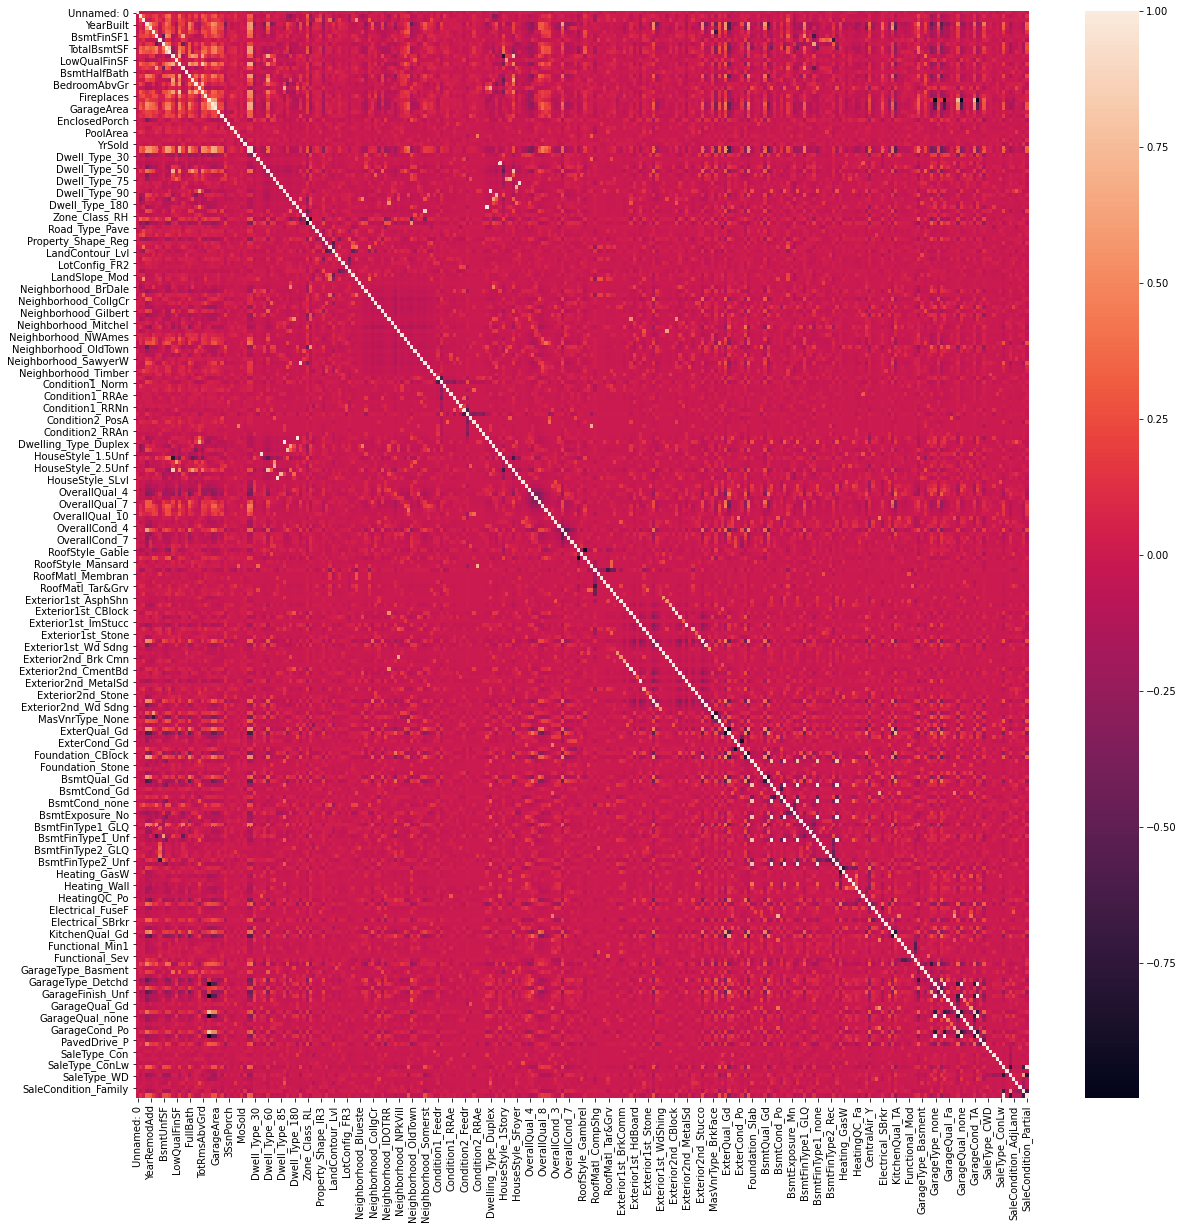

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,20]
import seaborn as sns
sns.heatmap(data.corr())

In [7]:
data.shape

(1451, 273)

# 1 - BY CHECKING CORRELATION



In [8]:
def correlation(dataset, threshold):
    col_corr = []
    corr_matrices = dataset.corr()
    for i in range(len(corr_matrices.columns)):
        for j in range(i):
            if (corr_matrices.iloc[i,j]) > threshold:
                col_names = corr_matrices.columns[i]
                col_corr.append(col_names)
    return col_corr

In [9]:
len(correlation(data, 0.7))

48

# 2 - BY CHEKING VARIANCE IN COLUMNS 

In [11]:
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(threshold = 0.1)
var.fit(data)

VarianceThreshold(threshold=0.1)

In [12]:
a = var.get_support()

# 3 - BY SELECTING USING INFORMATION GAIN

In [13]:
import pandas as pd

In [14]:
x = data.drop(['Property_Sale_Price'], axis = 1)
y = data['Property_Sale_Price']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3,random_state= 1)

In [16]:
data = data.drop('Unnamed: 0', axis = 1)

In [17]:
from sklearn.feature_selection import mutual_info_regression
mutual_info =  mutual_info_regression(x_train,y_train)

In [18]:
mutual_info

array([1.96206381e-02, 2.01529097e-01, 1.11837553e-01, 3.22043926e-01,
       2.44799008e-01, 1.08505582e-01, 1.47679557e-01, 2.73144065e-02,
       1.24197166e-01, 3.29074445e-01, 2.93117126e-01, 2.01369502e-01,
       2.20857330e-03, 4.35616059e-01, 1.47422141e-02, 9.08731048e-03,
       2.55004007e-01, 1.03433049e-01, 7.83983041e-02, 3.89853280e-02,
       1.67307828e-01, 1.72153960e-01, 2.34741787e-01, 3.30086055e-01,
       3.05242092e-01, 1.09169238e-01, 1.28836274e-01, 1.93794727e-02,
       0.00000000e+00, 6.69070103e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.14220801e-02, 5.13910754e+00, 4.59326224e-02,
       0.00000000e+00, 1.79123886e-03, 1.82699658e-02, 1.34636706e-01,
       3.68283705e-03, 4.77955567e-03, 4.89407508e-03, 2.71686808e-02,
       2.18603676e-02, 1.61127968e-03, 1.02577816e-02, 9.77671566e-03,
       7.42772032e-03, 1.65529917e-02, 1.03318513e-03, 5.35751740e-02,
       8.30465051e-02, 0.00000000e+00, 8.19697940e-03, 7.83328283e-03,
      

In [19]:
features = pd.DataFrame({'x_train.columns':[i for i in x_train.columns],
             'mutual_info':[ j for j in mutual_info]})

In [20]:
features.sort_values(by = 'mutual_info', ascending = False)

,x_train.columns,mutual_info
34,log_Property_Sale_Price,5.139108
13,GrLivArea,0.435616
23,GarageCars,0.330086
9,TotalBsmtSF,0.329074
3,YearBuilt,0.322044
...,...,...
183,ExterCond_Po,0.000000
142,RoofMatl_Roll,0.000000
182,ExterCond_Gd,0.000000
98,Condition1_RRNn,0.000000
